## Blood Type

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [3]:
# Load the dataset
df = pd.read_csv('datasets/healthcare_dataset.csv')
# Clean column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [4]:
blood_type = df.groupby('blood_type').size()
blood_type

blood_type
A+     6956
A-     6969
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
dtype: int64

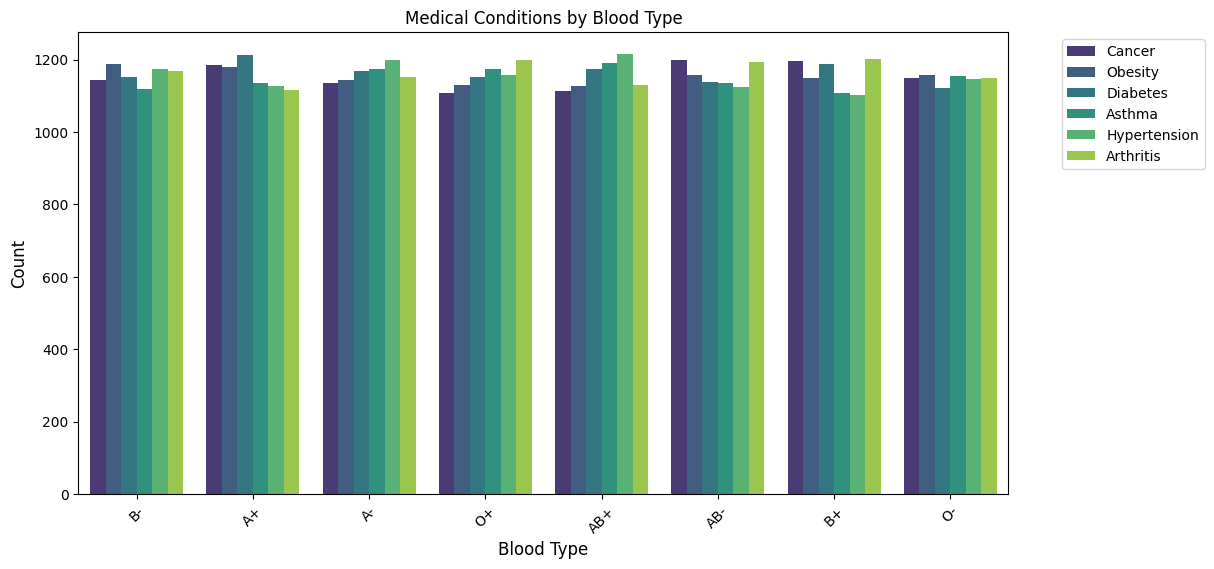

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='blood_type', hue='medical_condition', palette='viridis')
plt.title('Medical Conditions by Blood Type')
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

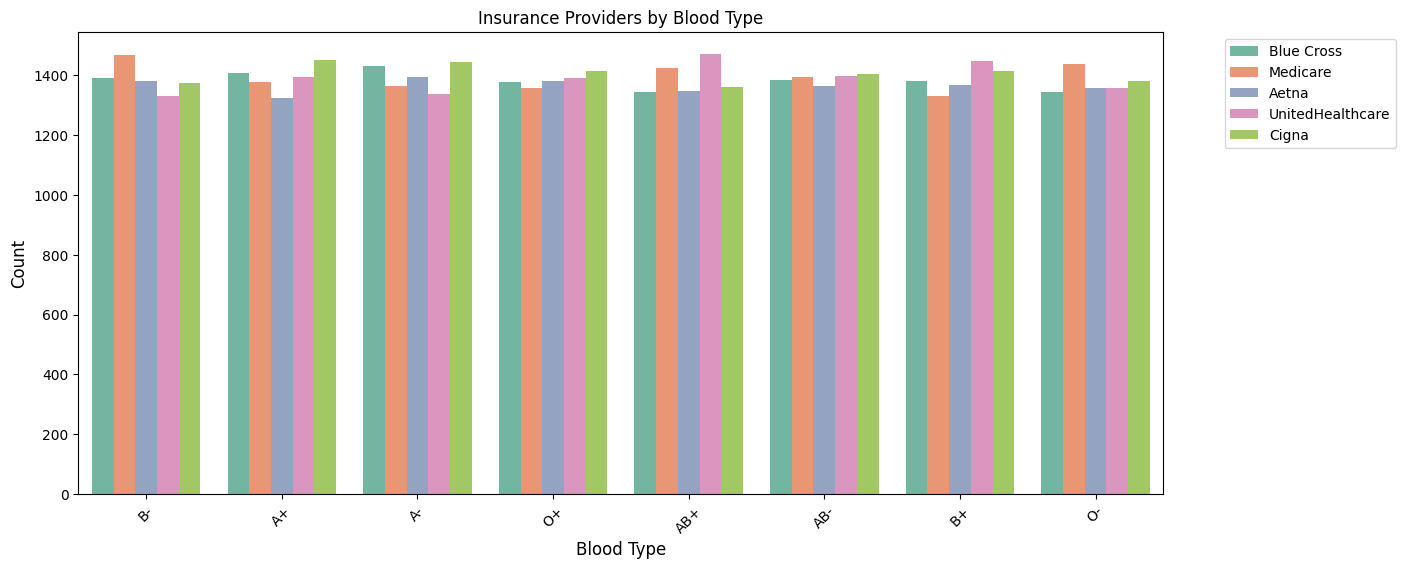

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='blood_type', hue='insurance_provider', palette='Set2')
plt.title('Insurance Providers by Blood Type')
plt.xticks(rotation=45)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

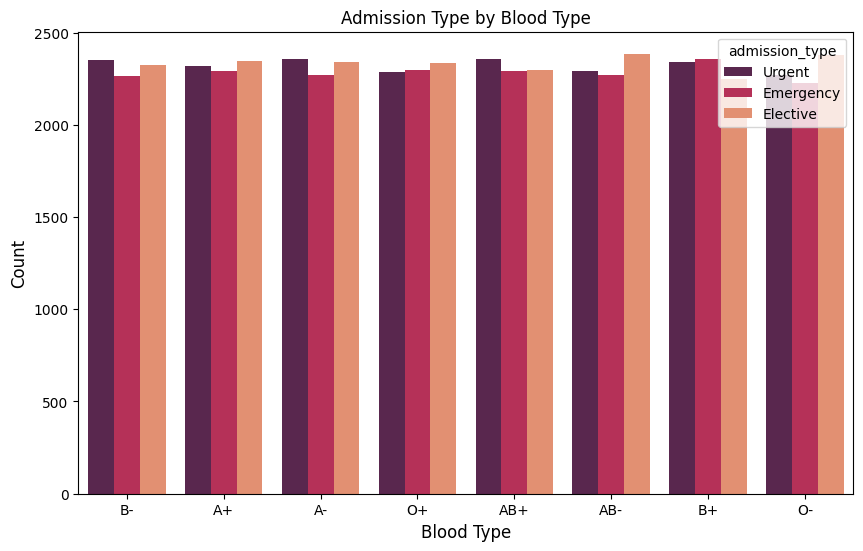

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='blood_type', hue='admission_type', palette='rocket')
plt.title('Admission Type by Blood Type')
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

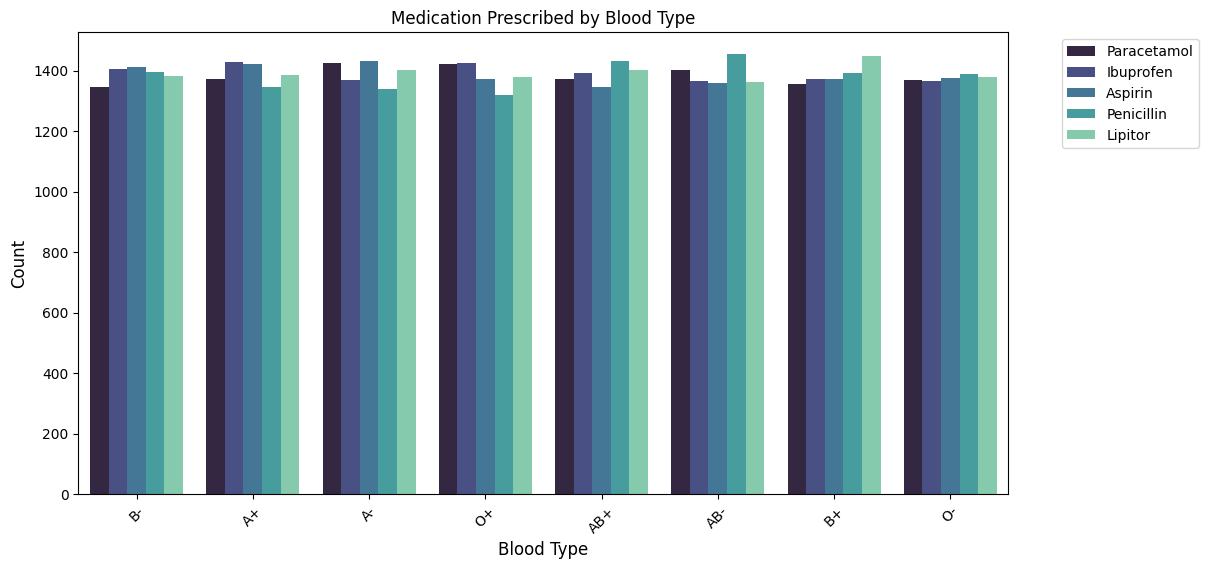

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='blood_type', hue='medication', palette='mako')
plt.title('Medication Prescribed by Blood Type')
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

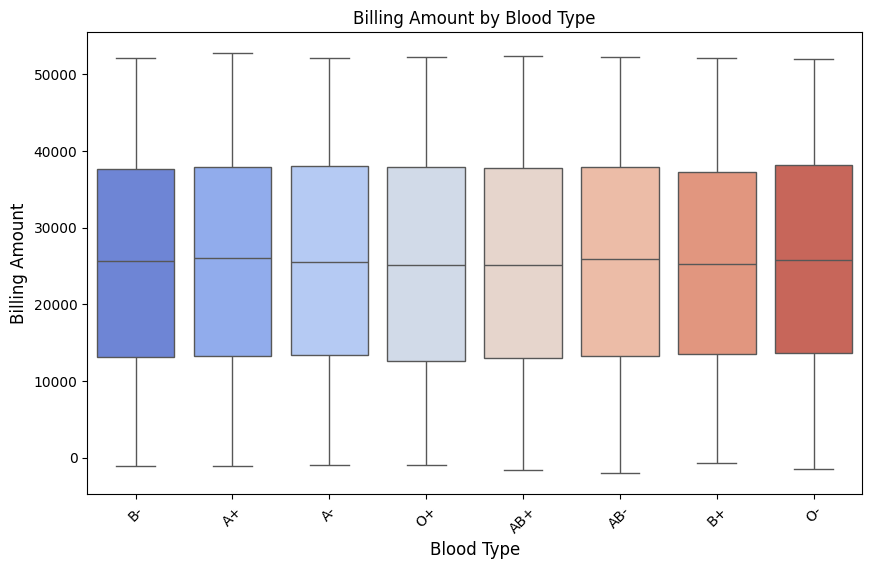

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='blood_type', y='billing_amount',hue='blood_type', palette='coolwarm', showfliers=False)
plt.title('Billing Amount by Blood Type')
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Billing Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()

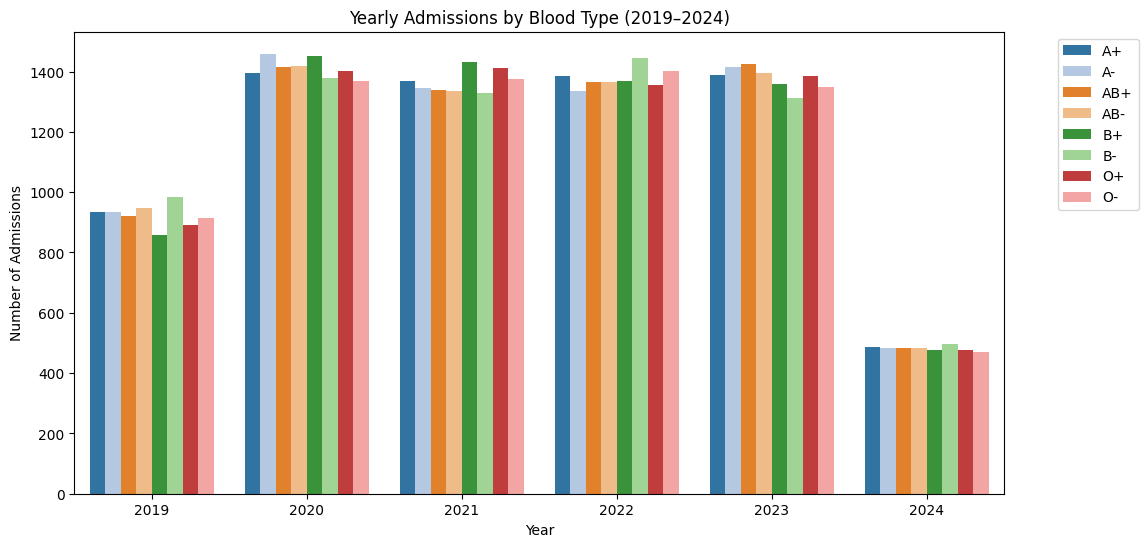

In [30]:

# Convert to datetime and extract year
df['Date of Admission'] = pd.to_datetime(df['date_of_admission'])
df['Year'] = df['Date of Admission'].dt.year

# Filter data for 2019–2024 (if needed)
df_years = df[df['Year'].between(2019, 2024)]

# Plot yearly admissions by blood type
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_years, 
    x='Year', 
    hue='blood_type', 
    palette='tab20',  # Use a distinct palette
    hue_order=sorted(df['blood_type'].unique())  # Optional: Order blood types
)
plt.title('Yearly Admissions by Blood Type (2019–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19184\2889613758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_age.index, y=avg_age.values,  palette='crest', legend=False)


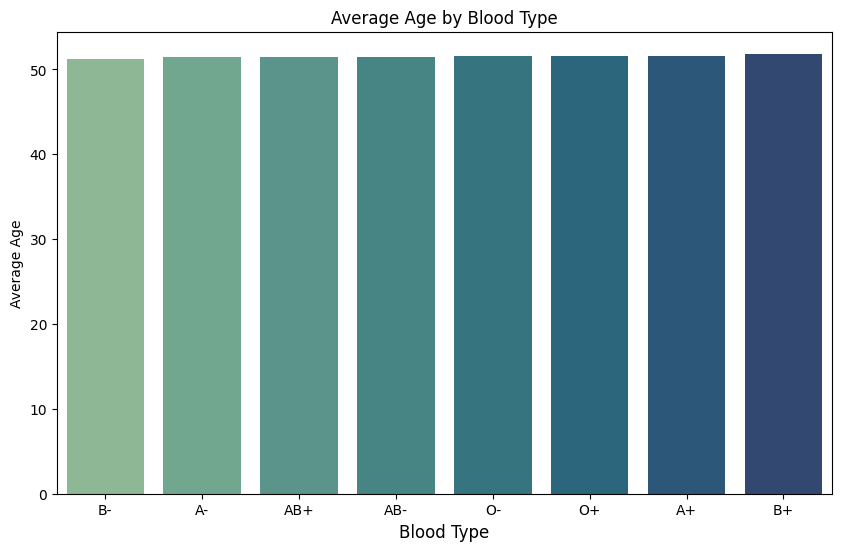

In [28]:
avg_age = df.groupby('blood_type')['age'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_age.index, y=avg_age.values,  palette='crest', legend=False)
plt.title('Average Age by Blood Type')
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Age')
plt.show()

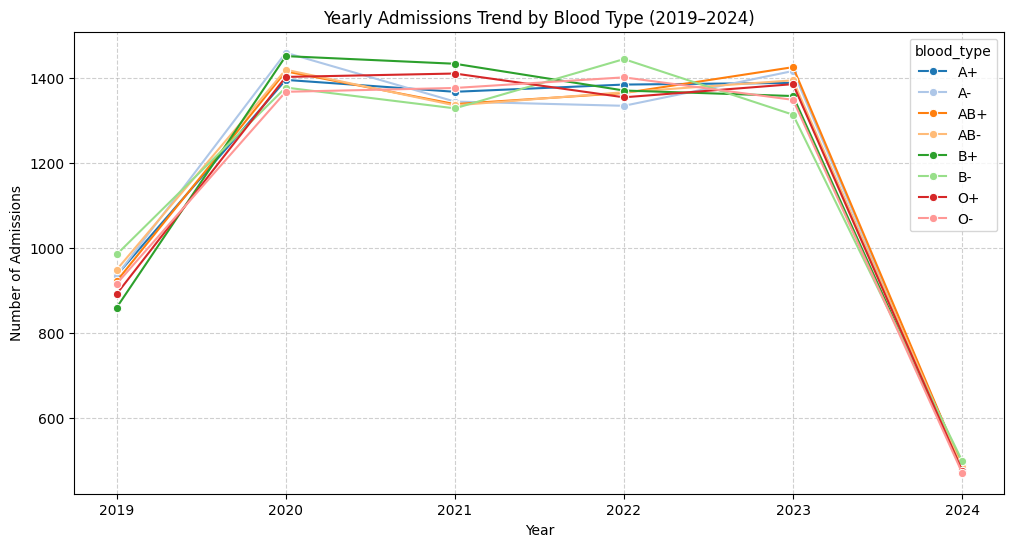

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_years.groupby(['Year', 'blood_type']).size().reset_index(name='Count'),
    x='Year', 
    y='Count', 
    hue='blood_type',
    marker='o',  # Add markers for each year
    palette='tab20'
)
plt.title('Yearly Admissions Trend by Blood Type (2019–2024)')
plt.ylabel('Number of Admissions')
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for readability
plt.show()

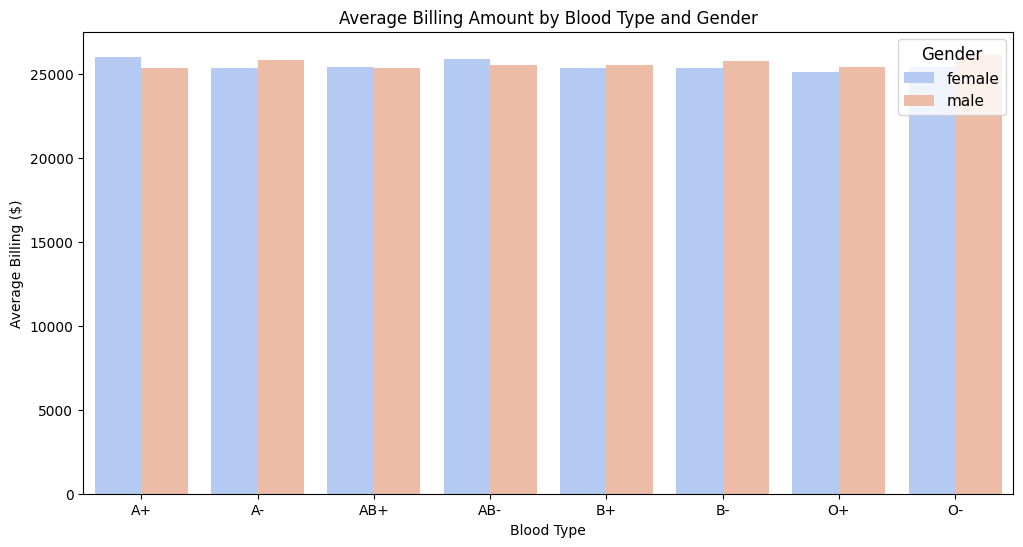

In [43]:
from matplotlib.ticker import FuncFormatter
# Ensure gender is standardized (lowercase/trimmed)
df['gender'] = df['gender'].str.lower().str.strip()

# Group by Blood Type and Gender
billing_by_blood_gender = df.groupby(['blood_type', 'gender'])['billing_amount'].mean().reset_index()

# Pivot for heatmap (optional)
pivot_table = billing_by_blood_gender.pivot(index='blood_type', columns='gender', values='billing_amount')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=billing_by_blood_gender, 
    x='blood_type', 
    y='billing_amount', 
    hue='gender',
    palette='coolwarm'
)
plt.title('Average Billing Amount by Blood Type and Gender')
plt.ylabel('Average Billing ($)')
plt.xlabel('Blood Type')
plt.legend(title='Gender')

# Adjust legend
plt.legend(title='Gender', fontsize=11, title_fontsize=12)

plt.show()

In [40]:
stats = df.groupby(['blood_type', 'gender'])['billing_amount'].agg(['mean', 'median', 'std', 'count'])
stats

mean        median           std  count
blood_type gender                                                 
A+         female  25969.487306  26432.962530  14185.587650   3564
           male    25344.183712  25496.039663  14305.006916   3392
A-         female  25365.939872  25133.509336  14167.778980   3449
           male    25819.488784  25880.061393  14117.127685   3520
AB+        female  25408.973155  25306.092881  14273.741985   3438
           male    25314.905804  24883.444192  14174.634048   3509
AB-        female  25855.718137  25938.970688  14152.174296   3461
           male    25535.209485  25909.899130  14233.144857   3484
B+         female  25331.965023  24958.087402  14050.010860   3377
           male    25522.248317  25433.603170  14072.339530   3568
B-         female  25314.969812  25281.630443  14148.443646   3461
           male    25732.556461  25952.143544  14192.664137   3483
O+         female  25078.875990  25085.265148  14373.303417   3464
           male    25421.149714  25230.506215  14444.563530   3453
O-         female  25421.375717  25138.872767  14267.246798   3512
           male    26186.290461  26488.484166  14210.347629   3365

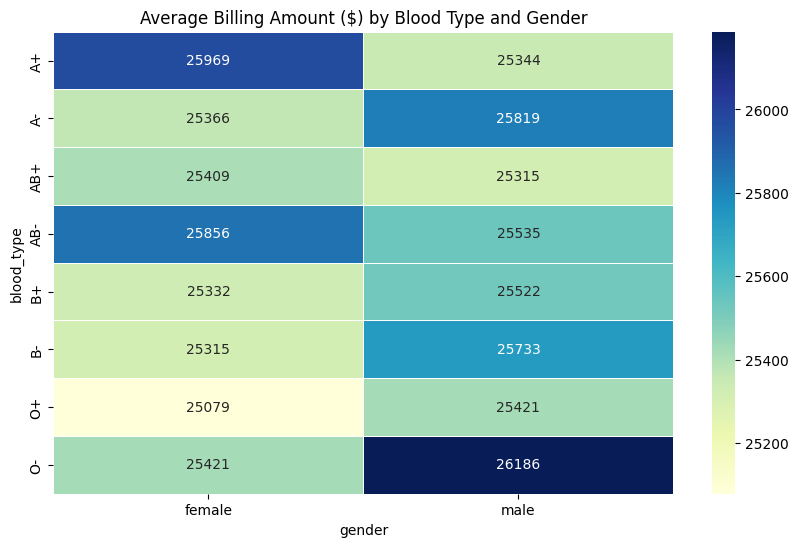

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table, 
    annot=True, 
    fmt='.0f', 
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('Average Billing Amount ($) by Blood Type and Gender')
plt.show()